# Collaborative filtering - memory based using cosine distance and latent factor model 

Recommender systems are an integral part of many online systems. From e-commerce to online streaming platforms.
Recommender systems employ the past purchase patters on it's user to predict which other products they may in interested in and likey to purchase. Recommending the right products gives a significat advantage to the business. A mojor portion of the revenue is generated through recommendations.


The Collaborative Filtering algorithm is very popular in online streaming platforms and e-commerse sites where the customer interacts with each product (which can be a movie/ song or consumer products) by either liking/ disliking or giving a rating of sorts.
One of the requirements to be able to apply collaborative filtering is that sufficient number of products need ratings associated with not them. User interaction is required.




This notebook walks through the implementation of plotly for exploratory analysis of the yelp data.

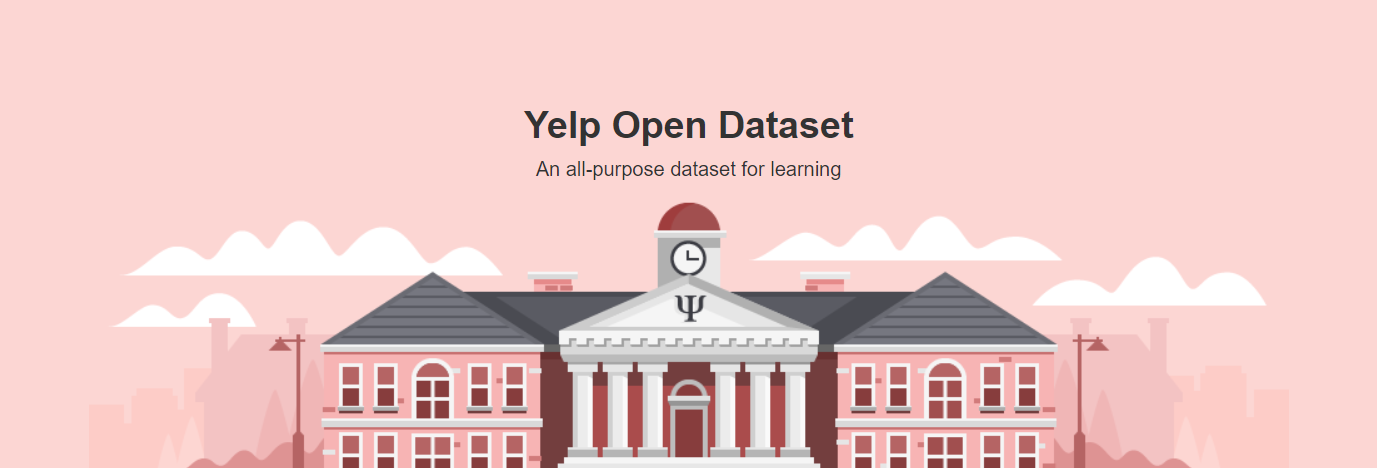

Yelp.com, is a crowd-sourced local business review and social networking site. The site has pages devoted to individual locations, such as restaurants or schools, where Yelp users can submit a review of their products or services using a one to five star rating scale. Businesses can also update contact information, hours, and other basic listing information or add special deals. In addition to writing reviews, users can react to reviews, plan events, or discuss their personal lives.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Embedding, Add, Dot, Flatten
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import pydot
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from operator import itemgetter
from sklearn.decomposition import PCA
import re
%matplotlib inline
%matplotlib notebook

2.9.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
user_path = '/content/drive/MyDrive/Univ/DS1/yelp/user_trimmed.csv'
review_path = '/content/drive/MyDrive/Univ/DS1/yelp/review_trimmed.csv'
df_user = pd.read_csv(user_path)
df_review = pd.read_csv(review_path)


In [5]:
df_user.head()

user_id       name  review_count        yelping_since  \
0  q_QQ5kBBwlCcbL1s4NVK3g       Jane          1220  2005-03-14 20:26:35   
1  dIIKEfOgo0KqUfGQvGikPg       Gabi          2136  2007-08-10 19:01:51   
2  D6ErcUnFALnCQN4b1W_TlA      Jason           119  2007-02-07 15:47:53   
3  JnPIjvC0cmooNDfsa9BmXg        Kat           987  2009-02-09 16:14:29   
4  37Hc8hr3cw0iHLoPzLK6Ow  Christine           495  2008-03-03 04:57:05   

   useful  funny   cool                                              elite  \
0   15038  10030  11291       2006,2007,2008,2009,2010,2011,2012,2013,2014   
1   21272  10289  18046  2007,2008,2009,2010,2011,2012,2013,2014,2015,2...   
2     188    128    130                                          2010,2011   
3    7234   4722   4035                      2009,2010,2011,2012,2013,2014   
4    1577    727   1124                                     2009,2010,2011   

                                             friends  fans  ...  \
0  xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...  1357  ...   
1  XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...  1025  ...   
2  GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...    16  ...   
3  HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...   420  ...   
4  -Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...    47  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0              163                 190              361              147   
1               87                  94              232               96   
2                1                   3                0                0   
3              129                  93              219               90   
4               19                  32               16               15   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0             1212              5691             2541              2541   
1             1187              3293             2205              2205   
2                5                20               31                31   
3             1120              4510             1566              1566   
4               77               131              310               310   

   compliment_writer  compliment_photos  
0                815                323  
1                472                294  
2                  3                  1  
3                391                326  
4                 98                 44  

[5 rows x 22 columns]

Check the first 5 rows of the user dataset

In [6]:
df_review.head()


review_id                 user_id             business_id  \
0  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
1  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
2  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
3  J4a2TuhDasjn2k3wWtHZnQ  RNm_RWkcd02Li2mKPRe7Eg  xGXzsc-hzam-VArK6eTvtw   
4  9vqwvFCBG3FBiHGmOHMmiA  XGkAG92TQ3MQUKGX9sLUhw  DbXHNl890xSXNiyRczLWAg   

   stars  useful  funny  cool                 date  
0      4       1      0     0  2015-07-03 20:38:25  
1      5       0      0     0  2013-05-28 20:38:06  
2      2       1      1     1  2010-01-08 02:29:15  
3      1       2      0     0  2018-01-21 04:41:03  
4      5       0      0     0  2017-12-02 18:16:13

See the number of unique values present

In [7]:
print('unique users:',len(df_review.user_id.unique()))
print('unique products:',len(df_review.business_id.unique()))
print("total ratings: ",df_review.shape[0])


unique users: 1992673
unique products: 123148
total ratings:  6967759


Check for null values

In [8]:
df_review.isnull().any()

review_id      False
user_id        False
business_id    False
stars          False
useful         False
funny          False
cool           False
date           False
dtype: bool

Number of rated businesses per user

In [9]:
business_user= df_review.groupby(by = "user_id")["stars"].count().sort_values(ascending =False)
business_user.head()

user_id
RtGqdDBvvBCjcu5dUqwfzA    4697
Xwnf20FKuikiHcSpcEbpKQ    2774
tgrs5VQ6thhouiEtMU-N_w    1705
j14WgRoU_-2ZE1aw1dXrJg    1448
jpIGlAym6z88W2xzHiK5_A    1418
Name: stars, dtype: int64

Number of ratings per business

In [10]:
business_rated = df_review.groupby(by = "business_id")["stars"].count().sort_values(ascending = False)
business_rated.head()


business_id
4CxF8c3MB7VAdY8zFb2cZQ    9295
OQ2oHkcWA8KNC1Lsvj1SBA    7394
PrsvO1rzkgg6qFizlAoEtg    7385
y2w6rFaO0XEiG5mFfOsiFA    5220
MGzro82Fi4LYvc86acoONQ    5071
Name: stars, dtype: int64

Number of businesses with some minimum ratings

In [11]:
print('Number of businesses with minimum of 5000 reviews/ratings:',business_rated[business_rated>5000].count())
print('Number of businesses with minimum of 1000 reviews/ratings:',business_rated[business_rated>1000].count())
print('Number of businesses with minimum of 500 reviews/ratings:',business_rated[business_rated>500].count())
print('Number of businesses with minimum of 100 reviews/ratings:',business_rated[business_rated>100].count())
print('Number of businesses with minimum of 50 reviews/ratings:',business_rated[business_rated>50].count())
print('Number of businesses with minimum of 10 reviews/ratings:',business_rated[business_rated>10].count())
print('Number of businesses with minimum of 5 reviews/ratings:',business_rated[business_rated>5].count())

Number of businesses with minimum of 5000 reviews/ratings: 5
Number of businesses with minimum of 1000 reviews/ratings: 408
Number of businesses with minimum of 500 reviews/ratings: 1741
Number of businesses with minimum of 100 reviews/ratings: 15791
Number of businesses with minimum of 50 reviews/ratings: 29037
Number of businesses with minimum of 10 reviews/ratings: 82888
Number of businesses with minimum of 5 reviews/ratings: 113898


## Visualizing the data

In [12]:
import plotly.graph_objects as go
index = ['Total size of records', "Number of unique users","Number of unique businesses"]
values =[len(df_review),len(df_review['user_id'].unique()),len(df_review['business_id'].unique())]

plot = go.Figure([go.Bar(x=index, y=values, textposition='auto')])
plot.update_layout(title_text='Number of Users and Businesses w.r.to Total size of Data',
                    xaxis_title="Records",
                    yaxis_title="Total number of Records")

plot.show()


### The ratings given by users

In [13]:
print("Range of Ratings: ", "\n", df_review['stars'].value_counts())
print(list(df_review['stars'].value_counts()))

Range of Ratings:  
 5    3219916
4    1485988
1    1026326
3     698855
2     536674
Name: stars, dtype: int64
[3219916, 1485988, 1026326, 698855, 536674]


In [14]:

values = list(df_review['stars'].value_counts())

plot = go.Figure([go.Bar(x = df_review['stars'].value_counts().index, y = values,textposition='auto')])

plot.update_layout(title_text='Ratings given by user',
                    xaxis_title="Rating",
                    yaxis_title="Total number of Ratings")

plot.show()


### Businesses which are most popular

In [15]:
print("Businesses with occurred the most: \n",df_review['business_id'].value_counts().nlargest(5))

Businesses with occurred the most: 
 4CxF8c3MB7VAdY8zFb2cZQ    9295
OQ2oHkcWA8KNC1Lsvj1SBA    7394
PrsvO1rzkgg6qFizlAoEtg    7385
y2w6rFaO0XEiG5mFfOsiFA    5220
MGzro82Fi4LYvc86acoONQ    5071
Name: business_id, dtype: int64


In [16]:


values = list(df_review['business_id'].value_counts())


plot = go.Figure([go.Bar(x = df_review['business_id'].value_counts().nlargest(5).index, y = values,textposition='auto')])

plot.update_layout(title_text='Most rated Businesses',
                    xaxis_title="Business ID",
                    yaxis_title="Number of times occurred in the data")

plot.show()


### Average rating given by each user


In [17]:
ratings_per_user = df_review.groupby('user_id')['stars'].count().sort_values(ascending=False)
print("Average rating given by each user: ", '\n',ratings_per_user.head())

Average rating given by each user:  
 user_id
RtGqdDBvvBCjcu5dUqwfzA    4697
Xwnf20FKuikiHcSpcEbpKQ    2774
tgrs5VQ6thhouiEtMU-N_w    1705
j14WgRoU_-2ZE1aw1dXrJg    1448
jpIGlAym6z88W2xzHiK5_A    1418
Name: stars, dtype: int64


In [18]:


plot = go.Figure(data=[go.Histogram(x=ratings_per_user)])
plot.show()


In [19]:
ratings_per_business = df_review.groupby('business_id')['stars'].count().sort_values(ascending=False)
plot = go.Figure(data=[go.Histogram(x=ratings_per_business)])
plot.show(title_text='Number of ratings per business',
                    xaxis_title="Business",
                    yaxis_title="Number of ratings")

In [20]:
ratings_per_business = df_review.groupby('business_id')['stars'].count().sort_values(ascending=False)


plot = go.Figure(data=[go.Histogram(x=ratings_per_business.nlargest(2000))])
plot.show(title_text='Number of ratings per business',
                    xaxis_title="Businesses",
                    yaxis_title="Number of ratings")

### Distribution of businesses with ratings


In [21]:

rating_of_business = df_review.groupby('business_id')['stars'].count()
# convert to make dataframe to analyse data
number_of_ratings_given = pd.DataFrame(rating_of_business)

less_than_5 = []
greater_than_5_less_than_10 = []
greater_than_10_less_than_20 = []
greater_than_20_less_than_50 = []
greater_than_50_less_than_100 = []
greater_than_100_less_than_500 = []
greater_than_500_less_than_1000 = []
greater_than_1000 = []
average_rating = []

for rating in number_of_ratings_given['stars']:
    if rating <=5:      
      less_than_5.append(rating)
    if rating > 5 and rating <= 10:
      greater_than_5_less_than_10.append(rating)      
    if rating > 10 and rating <= 20:
      greater_than_10_less_than_20.append(rating)
    if rating > 20 and rating <= 50:
      greater_than_20_less_than_50.append(rating)
    if rating > 50 and rating <= 100:
      greater_than_50_less_than_100.append(rating)
    if rating > 100 and rating <= 500:
      greater_than_100_less_than_500.append(rating)
    if rating > 500 and rating <= 1000:
      greater_than_500_less_than_1000.append(rating)
    if rating > 1000:
      greater_than_1000.append(rating)
    average_rating.append(rating)
print('\n'*3, '-'*30, '\n'*3)
print("Ratings count <= 5: ", len(less_than_5))
print("5 < Ratings count <= 10: ", len(greater_than_5_less_than_10))
print("10 < Ratings count <= 20: ", len(greater_than_10_less_than_20))
print("20 < Ratings count <= 50: ", len(greater_than_20_less_than_50))
print("50 < Ratings count <= 100: ", len(greater_than_50_less_than_100))
print("100 < Ratings count <= 500: ", len(greater_than_100_less_than_500))
print("500 < Ratings count <= 100: ", len(greater_than_500_less_than_1000))
print("1000 < Ratings count: ", len(greater_than_1000))
print("Average number of products rated by users: ", round(np.mean(average_rating), 2))






 ------------------------------ 



Ratings count <= 5:  9250
5 < Ratings count <= 10:  31010
10 < Ratings count <= 20:  26775
20 < Ratings count <= 50:  27076
50 < Ratings count <= 100:  13246
100 < Ratings count <= 500:  14050
500 < Ratings count <= 100:  1333
1000 < Ratings count:  408
Average number of products rated by users:  56.58


In [22]:
x_values = ['less_than_5', 'greater_than_5_less_than_10', 'greater_than_10_less_than_20', 'greater_than_20_less_than_50', 'greater_than_50_less_than_100', 'greater_than_100_less_than_500', 'greater_than_500_less_than_1000', 'greater_than_1000']
y_values = [len(less_than_5), len(greater_than_5_less_than_10), len(greater_than_10_less_than_20), len(greater_than_20_less_than_50), len(greater_than_50_less_than_100), len(greater_than_100_less_than_500), len(greater_than_500_less_than_1000), len(greater_than_1000)]


plot = go.Figure([go.Bar(x = x_values, y = y_values, textposition='auto')])

plot.add_annotation(
        x=1,
        y=1000,
        xref="x",
        yref="y")

plot.update_layout(title_text='Ratings Count on Businesses',
                    xaxis_title="Ratings Range",
                    yaxis_title="Count of Rating")
plot.show()
